This file is for analyzing already generated models with **three states** (mastered, unmastered-engaged, unmastered-disengaged).


In [20]:
from hmmlearn import hmm
import pandas as pd
import os
import numpy as np
import pickle
import math
import matplotlib.pyplot as plt
import statsmodels.graphics.boxplots as st

In [21]:
"""
Appends the error values of the file(sequence) to X and the length of the sequence to the array lengths. 
The scores (labels of me and the study participants) will be saved in array scores.

@param filename: name of file/sequence
@param X: array of error values for all practice opportunities of one practice mode
@param lengths: array of lengths of the individual sequences
@param scores: array of scores/labels of each practice opportunity
"""
def get_sequence(filename, X, lengths, scores):
    file = pd.read_csv(filename)
    for i, row in file.iterrows():
        X.append(list(row[4:]))
        scores.append(list(row[:2]))
    lengths.append(len(file))
    return X, lengths, scores

In [ ]:
"""
Appends SOME of the error values of the file(sequence) to X and the length of the sequence to the array lengths. 
The scores (labels of me and the study participants) will be saved in array scores.

@param filename: name of file/sequence
@param X: array of error values for all practice opportunities of one practice mode
@param lengths: array of lengths of the individual sequences
@param scores: array of scores/labels of each practice opportunity
"""
def get_sequences_one_hand(filename, X, lengths, scores):
    file = pd.read_csv(filename)
    skip = 0
    for i, row in file.iterrows():
        if "both" in row["level"]:
            skip += 1
        elif "left" in row["level"]:
            X.append([row[11], row[12]]) #choose here which errors to use
            scores.append(list(row[:2]))
        elif "right" in row["level"]:
            X.append([row[5], row[6]])
            scores.append(list(row[:2]))
    if (len(file)-skip) != 0:
        lengths.append(len(file)-skip)
    return X, lengths, scores

In [22]:
"""
Analysis of the scores/labels corresponding to the predicted state by the generated model.
Can print out mean, median, max, min for each label list.

@return data: scores/labels for each predicted state
@return dataName: name for visualization
"""
def analyse(model, X, lengths, scores):
    hidden_state = model.predict(X, lengths)
    index = 0
    for length in lengths:
        print(hidden_state[index:index+length])
        index += length
    comp = []
    for e1, e2 in zip(hidden_state, scores):
        comp.append((e1,e2[0], e2[1]))
    mean_scores0 = []
    mean_scores1 = []
    mean_scores2 = []
    my_scores0 = [] 
    my_scores1 = [] 
    my_scores2 = []
    their_scores0 = []
    their_scores1 = []
    their_scores2 = []
    for triple in comp:
        if not math.isnan(triple[1]):
            #print(triple[1])
            if triple[0] == 0:
                mean_scores0.append((triple[1] + triple[2])/2)
                my_scores0.append(triple[2])
                their_scores0.append(triple[1])
            elif triple[0] == 1:
                mean_scores1.append((triple[1] + triple[2])/2)
                my_scores1.append(triple[2])
                their_scores1.append(triple[1])
            else:
                mean_scores2.append((triple[1] + triple[2])/2)
                my_scores2.append(triple[2])
                their_scores2.append(triple[1])
    data = []
    dataName = []
    for name, liste in [("mean_0", mean_scores0), ("mean_1", mean_scores1), ("mean_s2", mean_scores2),
                         ("my_0", my_scores0), ("my_1", my_scores1), ("my_2", my_scores2), 
                         ("their_0", their_scores0), ("their_1", their_scores1), ("their_2", their_scores2)]:
            if liste:
                mean = np.mean(liste)
                median = np.median(liste)
                maxL = np.max(liste)
                minL = np.min(liste)
                #print("mean", mean)
                #print("median", median)
                #print("maxL", maxL)
                #print("minL", minL)
                #print("")
                data.append(liste)
                dataName.append(name)
            else:
                print("Liste is empty", name)
    return data, dataName

In [23]:
"""
Main-File: Iterates over all practice modes and all generated models for that practice mode and prints out the
predicted state sequences, the score(logProb) and transition probability.
"""
pm_data = []
pm_names = []
csv_files = ["None", "right hand", "right hand", "single note","single note", "slower", "slower", "split hands","split hands", "both hands", "both hands"]
pkl_files = ["identity1", "right hand1", "right hand2", "single note1","single note2", "slower1", "slower4","left hand4","left hand5", "both hands1", "both hands2"]
for csv_file, pkl_file in zip(csv_files, pkl_files):
    lengths = []
    X = []
    scores = []
    for filename in os.listdir(csv_file):
        X, lengths, scores = get_sequence(csv_file + "/" + filename, X, lengths, scores)
    try:
        with open("ThreeStatesToAnalyse/" + pkl_file + ".pkl", "rb") as file:
            model = pickle.load(file)    
        print(pkl_file)
        data, dataName= analyse(model, X, lengths, scores)
        pm_data.append(data)
        pm_names.append(dataName)
        print("score", model.score(X, lengths))
        print("transition prob\n", model.transmat_)
        print("")#print(scores)
    except:
        print("Something went wong")

identity1
[1 1 1 1]
[1 1 1]
[1 1 1 1 1 1 1 1 1 1 1]
[1 0 0 0 0]
[1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[1 1 1 1 1 1 1]
[1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[1 2 2 2 2 2 2 2 2 2 2 2 2]
[1 1]
[1 2 2]
[1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[1 2 2 2 2 2 2 2 2]
[1 1 1]
[1 2 2 2 2 2 2 2 2 2 2 2]
[1 2 2]
[1 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1]
[1 1 1]
[1 0 0 0]
[1 2 2 2]
[1 1 1]
[1 1 1]
[1 2 2 2]
score 3176.876387227742
transition prob
 [[1.00000000e+00 4.02280522e-14 0.00000000e+00]
 [3.58660816e-02 7.67772240e-01 1.96361678e-01]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

right hand1
[1 0 0]
[1 1 1 0 0 0]
[1 1 0 1 1 0 1 0 0 0]
[1 1 0 0 0]
[1 0 0 0]
[1 0 0 1 1 0 0 0 0]
Liste is empty mean_s2
Liste is empty my_2
Liste is empty their_2
score 796.8623768107519
transition prob
 [[8.12135386e-001 1.87864614e-001 0.00000000e+000]
 [5.99640031e-001 4.00359969e-001 1.87836810e-269]
 [0.00000000e+000 0.00000000e+000 1.00000000e+000]]

right hand2
[1 0 0]
[1 1 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0]
[

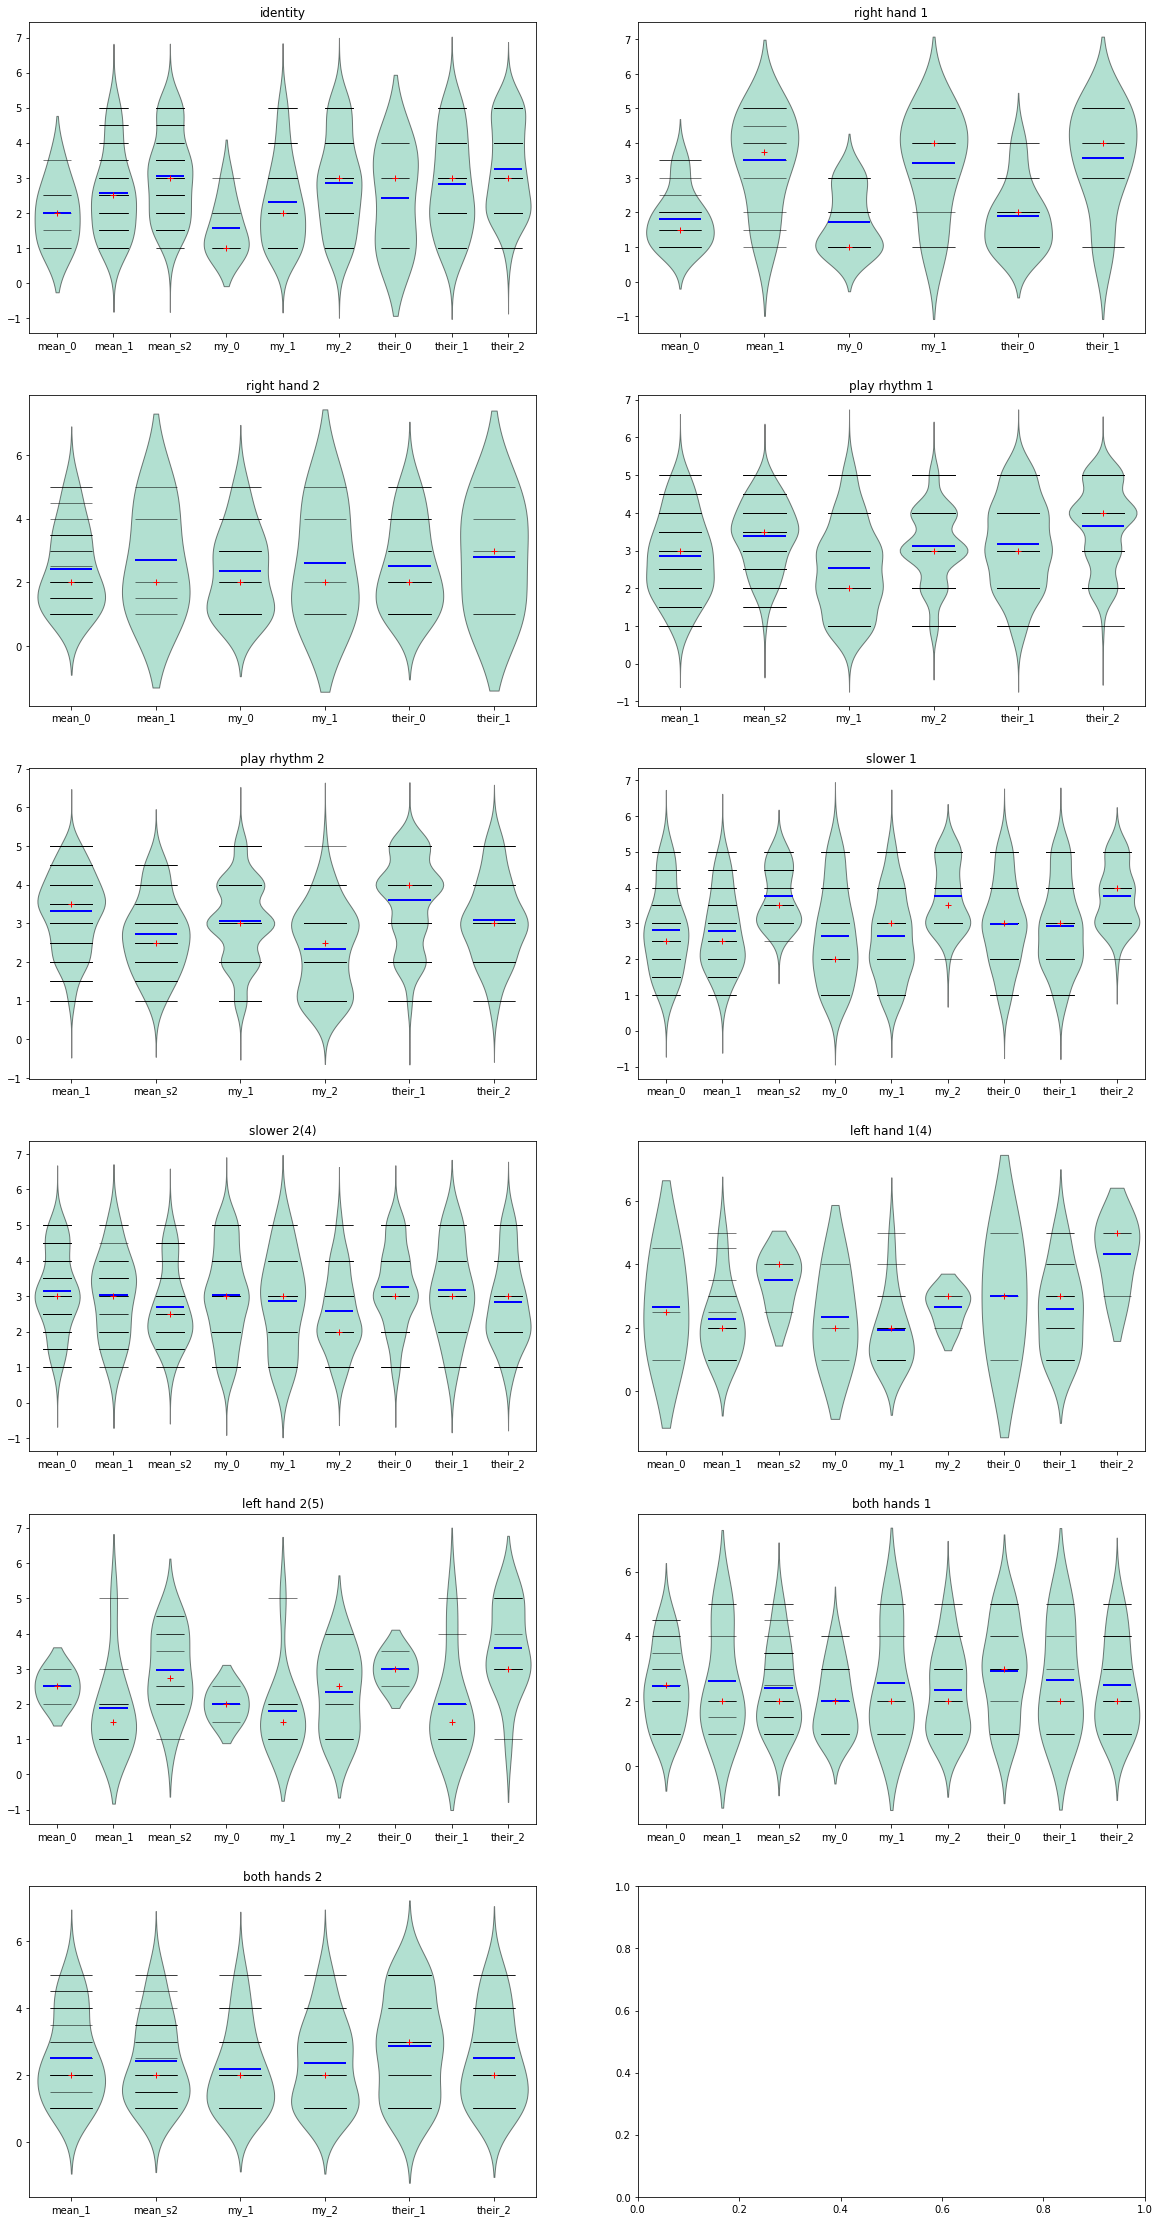

In [24]:
"""
This method displays bean plots for each generated model. The bean-plots refer to a state and show the 
distribution of scores/labels given by the study participants and myself for each practice opportunity.
"""

#dirty fix, since only one data point -> obviously not suitable model
pm_data[8][0] = [2.5, 2.0, 3.0]
pm_data[8][3] = [2.0, 2.5, 1.5]
pm_data[8][6] = [3.0, 3.5, 2.5]

#create bean plots of all ThreeStatesToBeAnalysed
fig, ax = plt.subplots(6,2, figsize=(20,40))

st.beanplot(pm_data[0], ax=ax[0,0])
ax[0,0].set_title("identity")
st.beanplot(pm_data[1], ax=ax[0,1])
ax[0,1].set_title("right hand 1")
st.beanplot(pm_data[2], ax=ax[1,0])
ax[1,0].set_title("right hand 2")
st.beanplot(pm_data[3], ax=ax[1,1])
ax[1,1].set_title("play rhythm 1")
st.beanplot(pm_data[4], ax=ax[2,0])
ax[2,0].set_title("play rhythm 2")
st.beanplot(pm_data[5], ax=ax[2,1])
ax[2,1].set_title("slower 1")
st.beanplot(pm_data[6], ax=ax[3,0])
ax[3,0].set_title("slower 2(4)")
st.beanplot(pm_data[7], ax=ax[3,1])
ax[3,1].set_title("left hand 1(4)")
st.beanplot(pm_data[8], ax=ax[4,0])
ax[4,0].set_title("left hand 2(5)")
st.beanplot(pm_data[9], ax=ax[4,1])
ax[4,1].set_title("both hands 1")
st.beanplot(pm_data[10], ax=ax[5,0])
ax[5,0].set_title("both hands 2")


ax[0,0].set_xticklabels(pm_names[0])
ax[0,1].set_xticklabels(pm_names[1])
ax[1,0].set_xticklabels(pm_names[2])
ax[1,1].set_xticklabels(pm_names[3])
ax[2,0].set_xticklabels(pm_names[4])
ax[2,1].set_xticklabels(pm_names[5])
ax[3,0].set_xticklabels(pm_names[6])
ax[3,1].set_xticklabels(pm_names[7])
ax[4,0].set_xticklabels(pm_names[8])
ax[4,1].set_xticklabels(pm_names[9])
ax[5,0].set_xticklabels(pm_names[10])

plt.savefig("BeanplotThreeStates.svg", bbox_inches='tight')
plt.savefig("BeanplotThreeStates.png", bbox_inches='tight')
plt.savefig("BeanplotThreeStates.jpg", bbox_inches='tight')

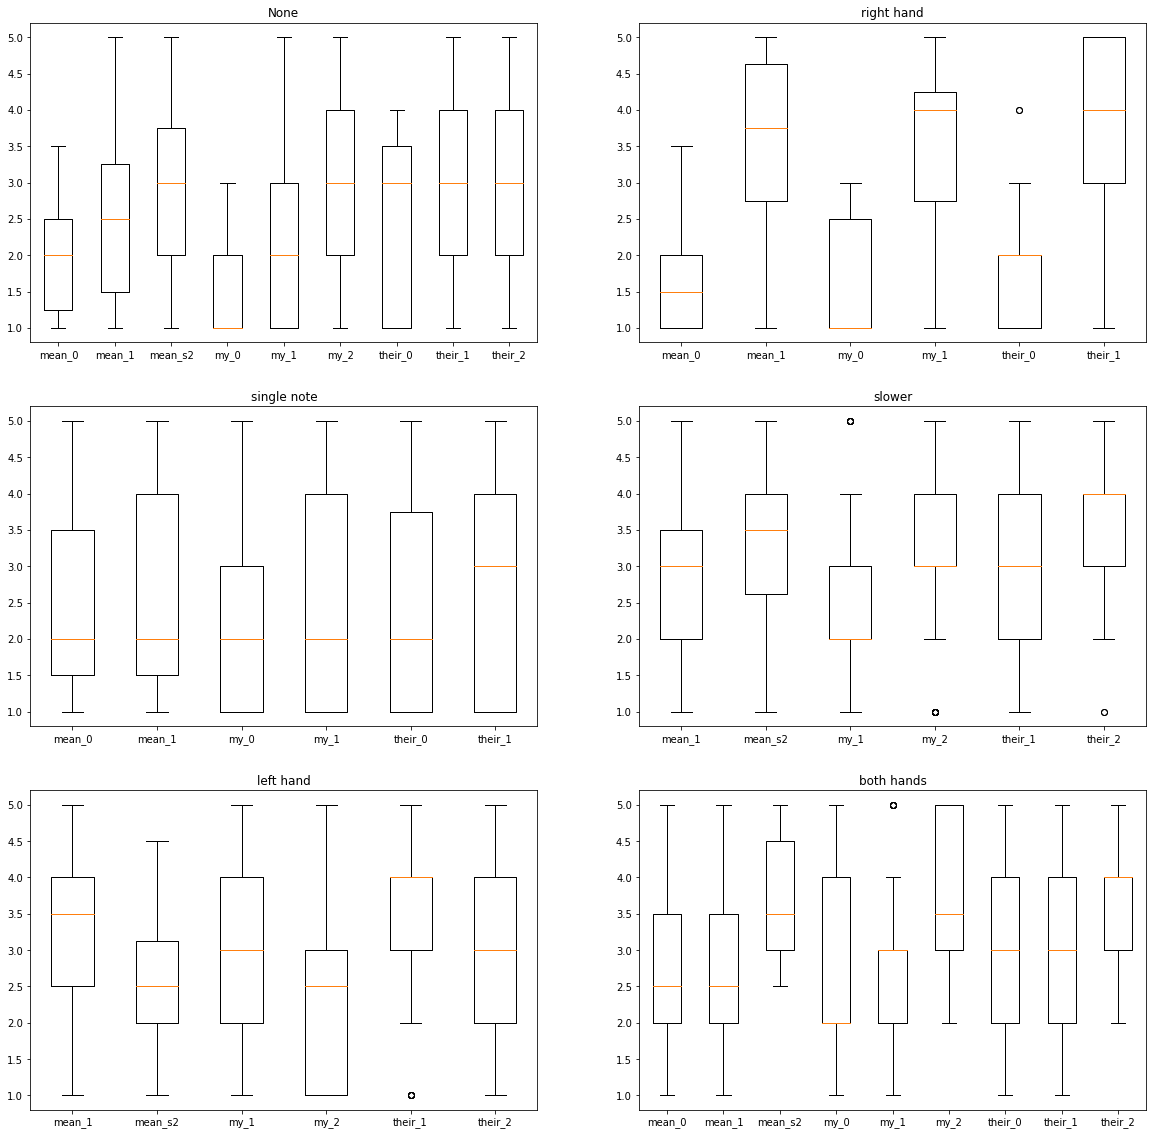

In [25]:
"""
This method displays box plots for each generated model. The box-plots refer to a state and show the 
distribution of scores/labels given by the study participants and myself for each practice opportunity.
"""
fig, ax = plt.subplots(3,2, figsize=(20,20))

ax[0,0].boxplot(pm_data[0])
ax[0,0].set_title("None")
ax[0,1].boxplot(pm_data[1])
ax[0,1].set_title("right hand")
ax[1,0].boxplot(pm_data[2])
ax[1,0].set_title("single note")
ax[1,1].boxplot(pm_data[3])
ax[1,1].set_title("slower")
ax[2,0].boxplot(pm_data[4])
ax[2,0].set_title("left hand")
ax[2,1].boxplot(pm_data[5])
ax[2,1].set_title("both hands")

ax[0,0].set_xticklabels(pm_names[0])
ax[0,1].set_xticklabels(pm_names[1])
ax[1,0].set_xticklabels(pm_names[2])
ax[1,1].set_xticklabels(pm_names[3])
ax[2,0].set_xticklabels(pm_names[4])
ax[2,1].set_xticklabels(pm_names[5])

plt.savefig("BoxplotThreeStates.png", bbox_inches='tight')
plt.savefig("BoxplotThreeStates.jpg", bbox_inches='tight')
plt.savefig("BoxplotThreeStates.svg", bbox_inches='tight')

**Disregard** the following, just for quick try out.

In [26]:
lengths = []
X = []
scores = []
hs1 = []
hs2 = []
directory = "identity"
for filename in os.listdir("None"):
    X, lengths, scores = get_sequence("None" + "/" + filename, X, lengths, scores)
try:
    with open("BestThreeStates/" + directory + "/" + directory + "3.pkl", "rb") as file:
        model = pickle.load(file)    
    print("Z12")
    #data, dataName, comp, mean, median, maxL, minL = analyse(model, X, lengths, scores)
    print("Z14")
    print("transition prob\n", model.transmat_)
    print("")#print(scores)
except:
    print("continue")
    
for filename in os.listdir("None"):
    X, lengths, scores = get_sequence("None" + "/" + filename, X, lengths, scores)
try:
    with open("BestThreeStates/" + directory + "/" + directory + "3_changed.pkl", "rb") as file:
        model = pickle.load(file)    
    print("Z28")
    #data, dataName, comp, mean, median, maxL, minL = analyse(model, X, lengths, scores)
    hs2 = model.predict(X, lengths)
    print("transition prob\n", model.transmat_)
    print("")#print(scores)
except:
    print("continue")
    
if hs1 != hs2:
    print("Oh yes!")

Z12
Z14
transition prob
 [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.72345636e-02 7.93185597e-01 1.89579839e-01]
 [0.00000000e+00 1.25422214e-49 1.00000000e+00]]

continue
